Importing all the required packages

In [1]:

import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



**NOTE** : Please enter Category Names same as folder name

In [2]:
image_folder = "./datasets"
Categories=[f for f in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, f))]

Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [3]:
import re
# Menggunakan regex untuk memuat file dengan ekstensi selain .png
jpg_pattern = re.compile(r'.*\.(jpg|jpeg)$', re.IGNORECASE)


In [4]:
from skimage import io, transform
import glob
from skimage.feature import hog

X = []
y = []

for label_id, label in enumerate(Categories):    
    image_paths = glob.glob(os.path.join(image_folder, label, "*"))
    image_paths = [image_path for image_path in image_paths if jpg_pattern.match(image_path)]
    for image_path in image_paths:
        image = io.imread(image_path)
        image = transform.resize(image, (128, 128))  # Resizing gambar
        fd = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, 
                 block_norm='L2-Hys', channel_axis=-1 # Untuk RGB
                 )
        X.append(fd)
        y.append(label_id)

Splitting the data into training and testing data

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import numpy as np

In [7]:
# Algoritma Klasifikasi
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# List model
models = {'SVM': svm_model, 'Random Forest': rf_model, 'KNN': knn_model, 'Naive Bayes': nb_model}

# Inisialisasi DataFrame untuk menyimpan hasil
results_df = pd.DataFrame(columns=['Model', 'Mean Accuracy'])

# Cross-validation dan evaluasi
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # Cross-validation dengan 5 fold
    mean_accuracy = np.mean(scores)
    print(f"\n{30*'='}\n{name}\n{30*'='}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.2f}")

    # Latih model pada data latih dan evaluasi pada data uji
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Tambahkan hasil ke DataFrame
    results_df = results_df.append({'Model': name, 'Mean Accuracy': mean_accuracy}, ignore_index=True)

    print(f"\n{30*'='}\n{name}\n{30*'='}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"\nClassification Report for {name} on Test Data:")
    print(classification_report(y_test, y_pred))

# Tampilkan hasil dalam bentuk DataFrame
print("\nResults DataFrame:")
results_df


SVM
Cross-validation scores: [0.37755102 0.43877551 0.47278912 0.4047619  0.40816327]
Mean Accuracy: 0.42


C:\Users\OWNER\AppData\Local\Temp\ipykernel_30388\516505178.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Mean Accuracy': mean_accuracy}, ignore_index=True)



SVM
Cross-validation scores: [0.37755102 0.43877551 0.47278912 0.4047619  0.40816327]
Mean Accuracy: 0.42

Classification Report for SVM on Test Data:
              precision    recall  f1-score   support

           0       0.33      0.22      0.26        37
           1       0.58      0.31      0.40        36
           2       0.46      0.68      0.55        37
           3       0.49      0.64      0.56        39
           4       0.43      0.46      0.44        39
           5       0.31      0.29      0.30        34
           6       0.29      0.38      0.33        37
           7       0.43      0.29      0.34        35

    accuracy                           0.41       294
   macro avg       0.42      0.41      0.40       294
weighted avg       0.42      0.41      0.40       294


Random Forest
Cross-validation scores: [0.35714286 0.46598639 0.52380952 0.36734694 0.39795918]
Mean Accuracy: 0.42


C:\Users\OWNER\AppData\Local\Temp\ipykernel_30388\516505178.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Mean Accuracy': mean_accuracy}, ignore_index=True)
C:\Users\OWNER\AppData\Local\Temp\ipykernel_30388\516505178.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Mean Accuracy': mean_accuracy}, ignore_index=True)



Random Forest
Cross-validation scores: [0.35714286 0.46598639 0.52380952 0.36734694 0.39795918]
Mean Accuracy: 0.42

Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.52      0.30      0.38        37
           1       0.36      0.39      0.37        36
           2       0.62      0.76      0.68        37
           3       0.59      0.69      0.64        39
           4       0.44      0.44      0.44        39
           5       0.33      0.32      0.33        34
           6       0.21      0.27      0.24        37
           7       0.39      0.26      0.31        35

    accuracy                           0.43       294
   macro avg       0.43      0.43      0.42       294
weighted avg       0.44      0.43      0.43       294


KNN
Cross-validation scores: [0.16326531 0.15646259 0.20068027 0.18367347 0.17346939]
Mean Accuracy: 0.18

KNN
Cross-validation scores: [0.16326531 0.15646259 0.20068027 0.1836

C:\Users\OWNER\AppData\Local\Temp\ipykernel_30388\516505178.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Mean Accuracy': mean_accuracy}, ignore_index=True)


,Model,Mean Accuracy
0,SVM,0.420408
1,Random Forest,0.422449
2,KNN,0.175510
3,Naive Bayes,0.338776


In [8]:
# Parameter Grid untuk pencarian grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV
cv_model = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
cv_model.fit(X_train, y_train)

# Hasil Hyperparameter Terbaik
best_params = cv_model.best_params_
print(f"Hyperparameter Terbaik: {best_params}")

# Evaluasi model pada data uji
y_pred = cv_model.predict(X_test)
print("\nClassification Report for Random Forest on Test Data:")
print(classification_report(y_test, y_pred))

c:\Users\OWNER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\OWNER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\OWNER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

Hyperparameter Terbaik: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.35      0.24      0.29        37
           1       0.40      0.33      0.36        36
           2       0.58      0.78      0.67        37
           3       0.56      0.69      0.62        39
           4       0.49      0.56      0.52        39
           5       0.38      0.32      0.35        34
           6       0.20      0.24      0.22        37
           7       0.41      0.26      0.32        35

    accuracy                           0.44       294
   macro avg       0.42      0.43      0.42       294
weighted avg       0.42      0.44      0.42       294



In [9]:

print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=cv_model.best_estimator_
model.fit(X_train,y_train)

The training of the model is started, please wait for while as it may take few minutes to complete


c:\Users\OWNER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=150, random_state=42)

Predicting our testing data

In [10]:
y_pred=model.predict(X_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([6, 3, 6, 2, 6, 2, 3, 6, 6, 0, 1, 5, 5, 1, 4, 6, 1, 2, 1, 2, 2, 7,
       0, 0, 4, 4, 1, 1, 4, 0, 3, 2, 0, 0, 5, 4, 4, 4, 0, 5, 6, 2, 2, 6,
       2, 4, 3, 4, 3, 2, 3, 6, 6, 3, 1, 2, 4, 3, 3, 6, 2, 3, 0, 6, 7, 0,
       1, 2, 0, 6, 6, 2, 6, 6, 4, 4, 6, 3, 6, 4, 4, 0, 4, 5, 6, 4, 3, 7,
       3, 3, 1, 6, 4, 0, 2, 7, 7, 2, 4, 6, 3, 2, 5, 2, 0, 4, 6, 4, 7, 1,
       5, 3, 2, 3, 1, 4, 6, 3, 4, 4, 2, 2, 3, 2, 7, 6, 1, 7, 3, 4, 5, 7,
       7, 5, 2, 2, 6, 6, 2, 1, 5, 4, 4, 6, 5, 3, 3, 4, 2, 6, 2, 3, 1, 3,
       3, 6, 6, 7, 1, 2, 7, 1, 7, 4, 0, 2, 2, 3, 1, 5, 3, 2, 4, 2, 2, 4,
       6, 0, 5, 2, 4, 5, 7, 3, 3, 1, 0, 2, 5, 4, 6, 3, 6, 1, 6, 3, 0, 1,
       2, 7, 5, 2, 3, 1, 7, 2, 2, 5, 4, 1, 3, 3, 3, 6, 0, 2, 6, 6, 2, 6,
       2, 2, 7, 5, 3, 5, 1, 3, 2, 3, 6, 5, 3, 1, 2, 5, 3, 4, 0, 6, 2, 3,
       3, 4, 5, 3, 5, 0, 4, 7, 5, 7, 3, 5, 3, 0, 2, 1, 4, 1, 4, 1, 6, 7,
       6, 2, 6, 4, 5, 5, 7, 4, 2, 7, 4, 1, 5, 1, 0, 4, 6, 0, 4, 2, 0, 0,
       3, 3, 0, 1, 4, 3, 4, 5])

In [11]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 3, 6, 6, 6, 2, 1, 1, 0, 6, 1, 5, 5, 4, 5, 4, 6, 2, 5, 1, 7, 7,
       2, 0, 1, 4, 0, 6, 4, 7, 3, 2, 0, 3, 5, 7, 4, 1, 3, 6, 0, 2, 2, 0,
       2, 2, 0, 4, 4, 2, 3, 0, 5, 0, 0, 2, 4, 7, 3, 6, 2, 3, 0, 1, 2, 0,
       1, 7, 6, 0, 6, 2, 3, 3, 3, 6, 0, 4, 0, 1, 0, 7, 6, 5, 0, 3, 3, 7,
       5, 0, 1, 4, 7, 1, 2, 7, 5, 7, 5, 0, 3, 5, 1, 6, 0, 0, 5, 4, 7, 1,
       6, 3, 2, 4, 6, 0, 4, 3, 5, 4, 1, 5, 0, 2, 5, 6, 5, 7, 0, 4, 7, 4,
       7, 5, 2, 2, 3, 5, 2, 3, 5, 4, 4, 1, 7, 3, 3, 4, 4, 6, 6, 3, 5, 0,
       0, 7, 7, 4, 7, 6, 1, 1, 7, 4, 7, 2, 6, 3, 7, 5, 3, 2, 4, 2, 6, 4,
       7, 0, 7, 2, 0, 5, 2, 7, 4, 4, 1, 5, 5, 6, 7, 3, 4, 1, 3, 6, 7, 1,
       2, 0, 7, 2, 3, 1, 4, 1, 2, 6, 4, 1, 0, 4, 3, 1, 7, 2, 6, 6, 2, 6,
       2, 5, 7, 1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 2, 6, 6, 3, 5, 6, 3, 7, 5,
       3, 4, 1, 3, 7, 5, 1, 5, 6, 6, 3, 1, 3, 6, 6, 3, 4, 6, 4, 0, 5, 3,
       0, 2, 2, 4, 5, 1, 7, 4, 2, 4, 4, 0, 6, 1, 4, 6, 5, 0, 0, 5, 0, 1,
       3, 7, 0, 1, 4, 7, 1, 5])

In [12]:
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.24      0.35      0.29        26
           1       0.33      0.40      0.36        30
           2       0.78      0.58      0.67        50
           3       0.69      0.56      0.62        48
           4       0.56      0.49      0.52        45
           5       0.32      0.38      0.35        29
           6       0.24      0.20      0.22        44
           7       0.26      0.41      0.32        22

    accuracy                           0.44       294
   macro avg       0.43      0.42      0.42       294
weighted avg       0.48      0.44      0.45       294

The model is 43.53741496598639% accurate


array([[ 9,  3,  1,  2,  1,  1,  4,  5],
       [ 4, 12,  1,  2,  2,  3,  4,  2],
       [ 0,  3, 29,  0,  1,  5,  8,  4],
       [ 8,  1,  0, 27,  5,  2,  1,  4],
       [ 5,  5,  1,  2, 22,  4,  4,  2],
       [ 0,  6,  1,  0,  0, 11,  6,  5],
       [10,  5,  2,  5,  4,  5,  9,  4],
       [ 1,  1,  2,  1,  4,  3,  1,  9]], dtype=int64)

Using Pickle to save the model to disk

In [13]:
pickle.dump(model,open('img_model.pkl','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

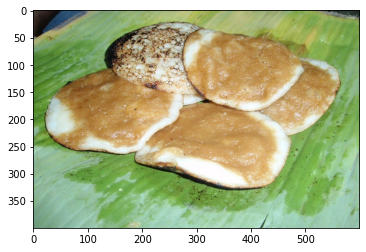

kue_dadar_gulung = 2.1523809523809523%
kue_kastengel = 3.722222222222222%
kue_klepon = 2.0999999999999996%
kue_lapis = 3.033333333333333%
kue_lumpur = 2.5500000000000007%
kue_putri_salju = 4.555555555555555%
kue_risoles = 1.111111111111111%
kue_serabi = 80.77539682539684%
The predicted image is : kue_serabi


In [27]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.pkl','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
image = io.imread(url)
image = transform.resize(image, (128, 128))  # Resizing gambar
fd = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, 
         block_norm='L2-Hys', channel_axis=-1 # untuk RGB
         ).reshape(1, -1)
probability=model.predict_proba(fd)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(fd)[0]])

This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)